http://cocodataset.org/#format-results

In [1]:
%matplotlib inline
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# please set directory
dataDir='C:/Users/user/kabir/ML/DR'

In [3]:
dataType='dr_mscoco_dot_hemorrhage'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Dot_hemorrhage

COCO supercategories: 
Dot_hemorrhage


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['Dot_hemorrhage']);
imgIds = coco.getImgIds(catIds=catIds );

In [7]:
catIds

[1]

In [8]:
len(imgIds)

68

In [9]:
img = coco.loadImgs(imgIds[4])[0]
filename = img['file_name']
path = '{}/{}/{}/{}'.format(dataDir, 'images_separated', 'Dot_hemorrhage',filename)
path

'C:/Users/user/kabir/ML/DR/images_separated/Dot_hemorrhage/1099_left_r_1_c_4.jpeg'

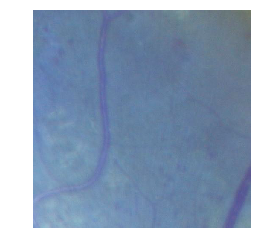

In [10]:
# Load an color image
im = cv2.imread(path)
plt.axis('off')
plt.imshow(im)
plt.show()

In [11]:
# load and display instance annotations
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [12]:
for ids in anns:
    bbox = ids['bbox']
    print(bbox)
    x = int(bbox[0])
    y = int(bbox[1])
    w = int(bbox[2])
    h = int(bbox[3])
    cv2.rectangle(img = im, 
              pt1 = (x,y), 
              pt2 = (x+w,y+h), 
              color = (0,255,0), 
              thickness = 2, 
              lineType = cv2.LINE_8, 
              shift = 0);

[39.0, 107.0, 22.0, 23.0]
[406.0, 328.0, 26.0, 27.0]


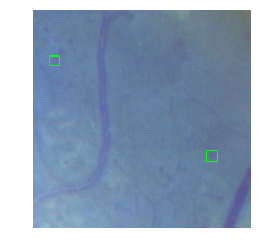

In [13]:
plt.axis('off')
plt.imshow(im)
plt.show()

In [14]:
annIds

[6, 7]

In [15]:
anns

[{'segmentation': [],
  'iscrowd': 0,
  'image_id': 5,
  'category_id': 1,
  'id': 6,
  'area': 506.0,
  'bbox': [39.0, 107.0, 22.0, 23.0]},
 {'segmentation': [],
  'iscrowd': 0,
  'image_id': 5,
  'category_id': 1,
  'id': 7,
  'area': 702.0,
  'bbox': [406.0, 328.0, 26.0, 27.0]}]